In [ ]:
# Dynamic Time Warping (DTW) is a technique used to measure the similarity between two
# time series, even if they vary in time or speed. Unlike traditional distance metrics like
# Euclidean distance, which requires the time points to be aligned, DTW can handle cases
# where one time series is stretched or compressed relative to another. Write a Python code
# to calculate the Euclidean distance and DTW for the the following time series:
# Time Series 1: 1, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 2, 1
# Time Series 2: 1, 1, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 2

In [1]:
import numpy as np
import pandas as pd
import math
from dtw import dtw
import matplotlib.pyplot as plt

Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



In [2]:
ts1=np.array([1, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 2, 1])
ts2=np.array([1, 1, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 2])

euclidean_distance = np.sqrt(np.sum((ts1 - ts2) ** 2))
alignment = dtw(ts1, ts2, keep_internals=True)

print(f"Euclidean Distance: {euclidean_distance}")
print(f"DTW Distance: {alignment.distance}")


Euclidean Distance: 3.4641016151377544
DTW Distance: 1.0


In [6]:
# Simulate motion artifact by adding low-frequency drift to this ECG signal from the
# NInFEA dataset [link]. 

In [3]:
drift = np.load('ECG_Q4.npy') 
len(drift)
drift.shape

(57490,)

In [4]:
import wfdb

record = wfdb.rdrecord("1")

signals = record.p_signal
print("Shape:", signals.shape)
print("Sampling rate:", record.fs)

Shape: (57490, 34)
Sampling rate: 2048


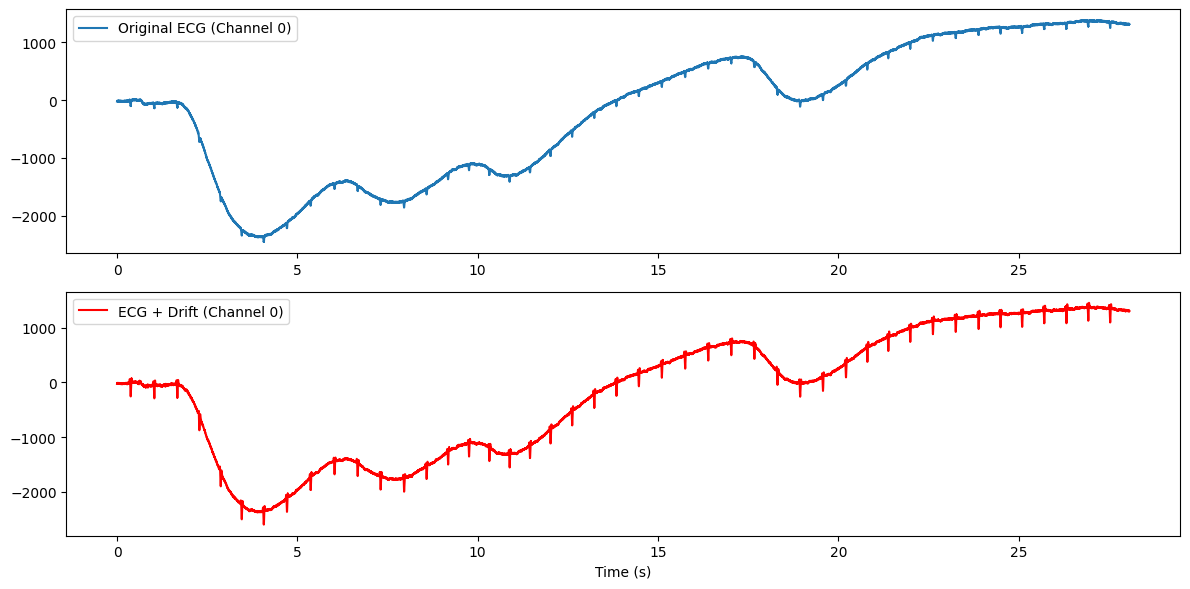

In [5]:
signal_artifact = signals[:,0] + drift    #get first channel

t = np.arange(signals.shape[0]) / record.fs

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t, signals[:, 0], label="Original ECG (Channel 0)")
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(t, signal_artifact, label="ECG + Drift (Channel 0)", color="r")
plt.legend()
plt.xlabel("Time (s)")
plt.tight_layout()

plt.savefig('Q4.png', dpi=300)
plt.show()

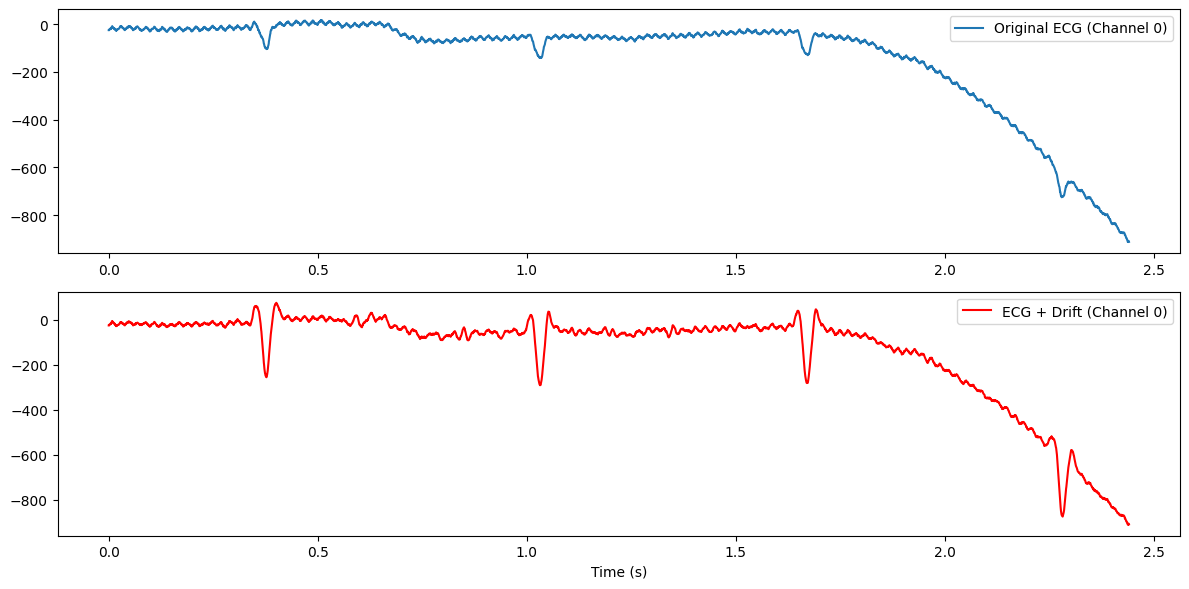

In [6]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t[:5000], signals[:, 0][:5000], label="Original ECG (Channel 0)")
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(t[:5000], signal_artifact[:5000], label="ECG + Drift (Channel 0)", color="r")
plt.legend()
plt.xlabel("Time (s)")
plt.tight_layout()

plt.savefig('Q4_first5000.png', dpi=300)
plt.show()

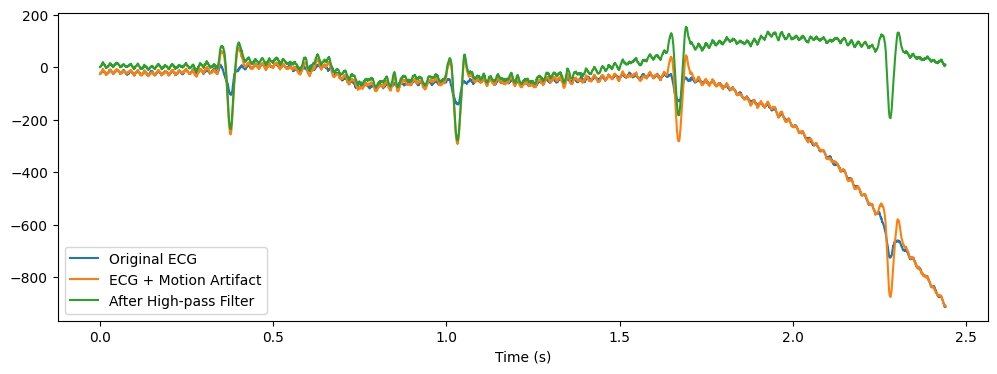

In [7]:
from scipy.signal import butter, filtfilt

# High-pass filter 
def highpass_filter(signal, fs, cutoff=0.5, order=2):
    b, a = butter(order, cutoff/(fs/2), btype='high')
    return filtfilt(b, a, signal)

signal_filtered = highpass_filter(signal_artifact, record.fs)

import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
plt.plot(t[:5000], signals[:, 0][:5000], label='Original ECG')
plt.plot(t[:5000], signal_artifact[:5000], label='ECG + Motion Artifact')
plt.plot(t[:5000], signal_filtered[:5000], label='After High-pass Filter')
plt.xlabel('Time (s)')
plt.legend()
# plt.title('ECG Motion Artifact Simulation and Correction (Channel 0)')

plt.savefig('high_pass.png', dpi=300)
plt.show()


In [ ]:
# Compute and interpret the power spectral density (PSD) of 1-D Doppler segments across
# all quality classes in the signals provided in this folder. Create realistic perturbations of
# “good” signals to mimic one of the following classes: poor, talking, and interference
# conditions at your choice. Evaluate how this changed quality predictions using the
# provided pretrained model/notebook [link]. A pretrained model and demo notebook are
# provided.

In [8]:
from scipy.io import wavfile
from scipy.io.wavfile import read, write

from scipy.signal import welch,hilbert

In [9]:
def getpsd(x, fs):
    x = np.asarray(x)

    N=len(x)

    acf_full=np.correlate(x, x, mode='full')

    acf=acf_full/acf_full[N-1]

    psd= np.abs(np.fft.rfft(acf))
    freqs=np.fft.rfftfreq(len(acf),d=1/fs)
    return freqs, psd

def extract_envelope(x):
    analytic = hilbert(x)
    env = np.abs(analytic)
    return env

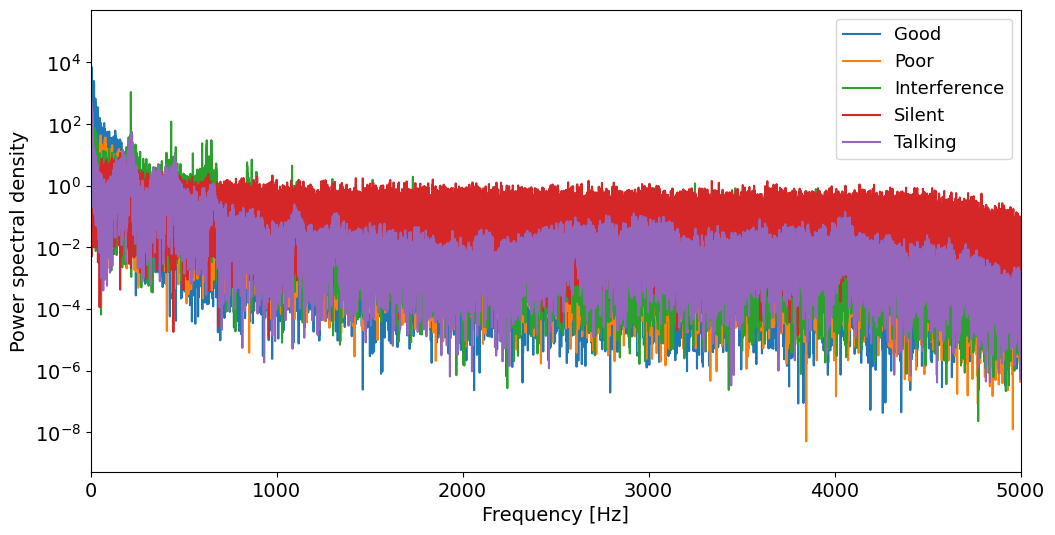

In [10]:
l=['Good','Poor','Interference','Silent','Talking']

plt.figure(figsize=(12,6))
for i in l:
    fs, recording = wavfile.read(f"{i}.wav")
    envelope = extract_envelope(recording)
    freqs, psd = getpsd(envelope, fs)
    plt.semilogy(freqs, psd, label=i)
    
plt.xlabel('Frequency [Hz]', size=14)
plt.ylabel('Power spectral density', size=14)
# plt.title('PSD of Doppler segment')
plt.xlim(0,5000)
plt.xticks(size=14)
plt.yticks(size=14)
plt.legend(fontsize=13)
plt.show()

In [11]:
def compute_psd(signal, fs, use_envelope=False, nperseg=None):
    signal = np.asarray(signal)
    
    if use_envelope:
        analytic = hilbert(signal)
        signal = np.abs(analytic)
    
    freqs, psd = welch(signal, fs=fs, nperseg=2048) # 1024
    return freqs, psd


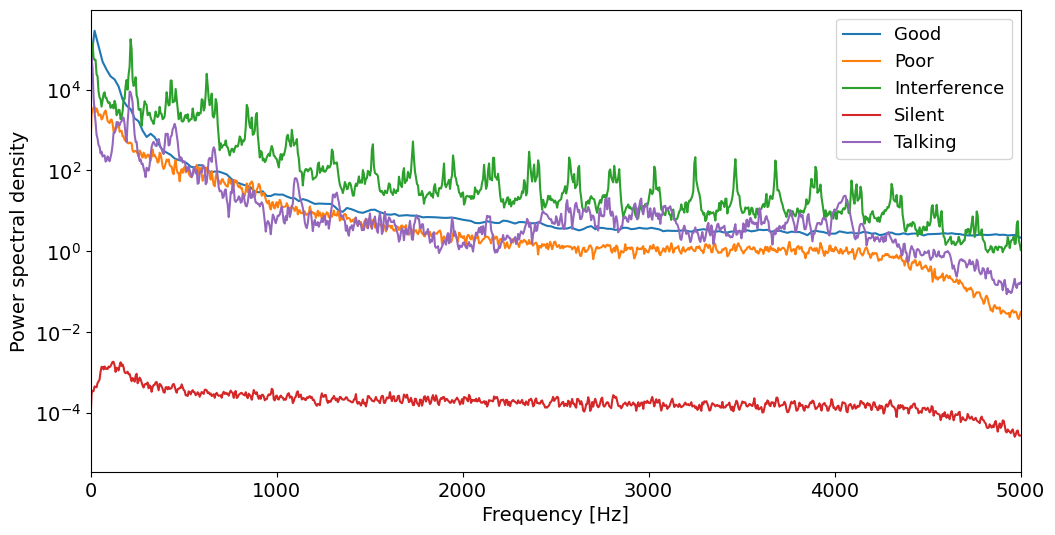

In [12]:
l=['Good','Poor','Interference','Silent','Talking']

plt.figure(figsize=(12,6))
for i in l:
    fs, recording = wavfile.read(f"{i}.wav")

    freqs, psd = compute_psd(recording, fs, use_envelope=True)
    plt.semilogy(freqs, psd, label=i)



plt.xlabel('Frequency [Hz]', size=14)
plt.ylabel('Power spectral density', size=14)
# plt.title('PSD of Doppler segment')
plt.xlim(0,5000)
plt.xticks(size=14)
plt.yticks(size=14)
plt.legend(fontsize=13)

plt.savefig('PSD.png',dpi=300)
plt.show()